<a href="https://colab.research.google.com/github/kingy0ujin/2024-1-my-BDA/blob/main/inhome/ch08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch08 그래프 만들기
- 그래프 : 데이터를 보기 쉽게 그림으로 표현한 것
- 그래프 -> 추세와 경향성이 드러나 특징을 쉽게 이해 가능, 새로운 패턴을 발견
- 파이썬 -> 2차원, 3차원, 지도, 네트워크, 시간에 따라 움직이는 모션 차트, 마우스 조작에 반응하는 인터랙티브 그래프를 만들 수 있는 패키지가 있음
- seaborn 패키지 -> 산점도, 막대, 선, 상자 그림

## 08-2 산점도 - 변수 간 관계 표현하기
- 산점도(scatter plot) : 데이터를 x축과 y축에 점으로 표현한 그래프
- 나이와 소득처럼 연속값으로 된 두 변수의 관계를 표현


### 산점도 만들기

In [3]:
!git clone https://github.com/ai7dnn/data.git

Cloning into 'data'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 35 (delta 2), reused 8 (delta 1), pack-reused 0
Receiving objects: 100% (35/35), 4.58 MiB | 5.91 MiB/s, done.
Resolving deltas: 100% (2/2), done.
Filtering content: 100% (4/4), 175.17 MiB | 69.17 MiB/s, done.


In [6]:
import pandas as pd
mpg = pd.read_csv("data/mpg.csv")

<Axes: xlabel='displ', ylabel='hwy'>

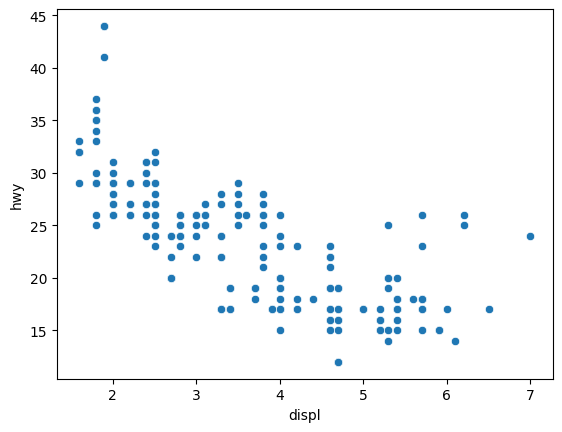

In [7]:
# x축은 displ, y축은 hwy를 나타낸 산점도 만들기
import seaborn as sns
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy')

### 축 범위 설정하기
- 기본적으로 최소값에서 최대값까지 모든 범위 표현하도록 설정
- sns.set()의 xlim()과 ylim()을 이용해 설정

[(3.0, 6.0)]

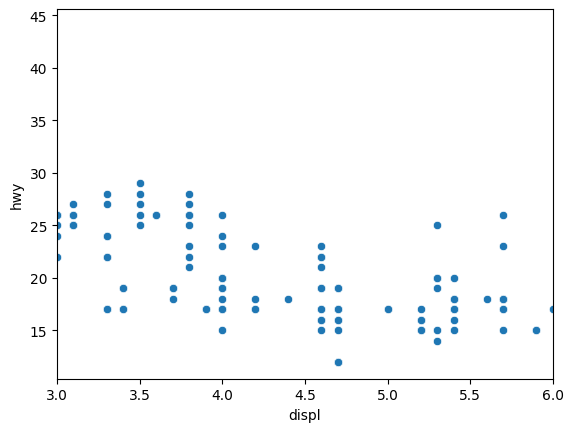

In [8]:
# x축 범위 3-6으로 제한
sns.scatterplot(data = mpg, x = 'displ', y='hwy') \
  .set(xlim = [3,6])

[(3.0, 6.0), (10.0, 30.0)]

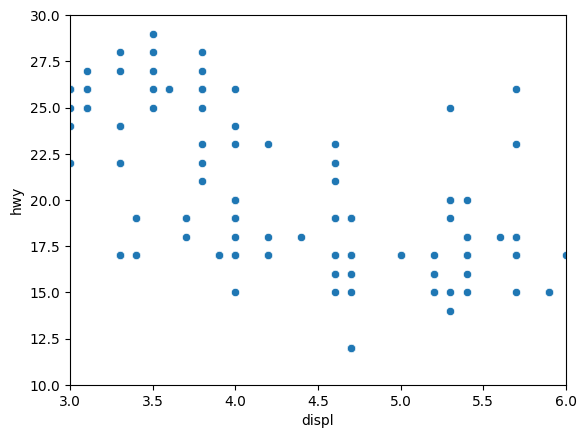

In [9]:
# x축 범위 3-6, y축 범위 10-30
sns.scatterplot(data = mpg, x ='displ', y='hwy')\
  .set(xlim=[3,6], ylim = [10,30])

### 종류별로 표식 색깔 바꾸기
- hue를 사용 -> 표식의 색깔을 종류별로 다르게 표현 가능


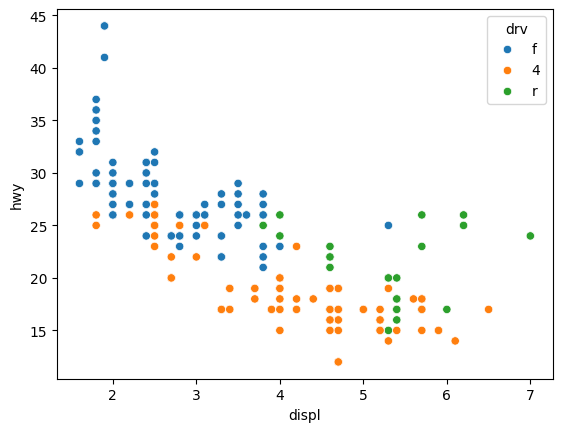

In [11]:
# drv 별 표식 색깔 다르게 표현
sns.scatterplot(data=mpg, x='displ', y='hwy', hue='drv');
# ; -> <Axes: xlabel='displ', ylabel='hwy'> 추가 설명 안나옴

### 혼자서 해보기

<Axes: xlabel='cty', ylabel='hwy'>

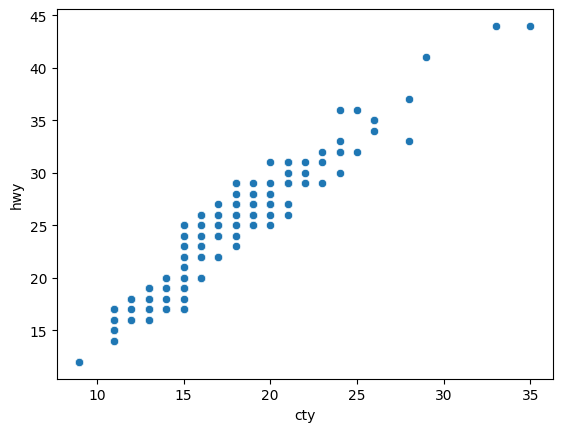

In [12]:
# mpg 데이터의 cty와 hwy간에 어떤 관계가 있는지 알아보려고 합니다.
# x축은 cty, y축은 hwy로 된 산점도를 만들어 보세요

import seaborn as sns
sns.scatterplot(data=mpg, x='cty', y='hwy')

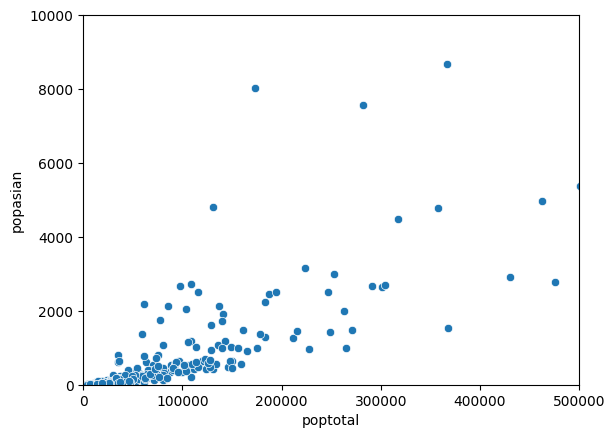

In [17]:
# 미국의 지역별 인구통계 정보를 담은 midwest.csv 이용 -> 전체 인구와 아시아인 인구 간에 관계 알아보기
# x축은 poptotal, y축은 popasian으로 된 산점도를 만들어 보세요.
# 전체 인구는 50만명 이하, 아시아인 인구는 1만명 이하인 지역만 산점도로 표시

import pandas as pd
midwest = pd.read_csv('data/midwest.csv')

sns.scatterplot(data=midwest, x = 'poptotal', y = 'popasian')\
  .set(xlim=[0,500000], ylim=[0,10000]);

## 08-3 막대 그래프 - 집단 간 차이 표현하기
- 막대 그래프 : 데이터의 크기를 막대의 길이로 표현한 그래프
- 성별 소득 차이처럼 집단 간 차이를 표현할 때 자주 사용

### 평균 막대 그래프 그리기
- 평균값의 크기를 막대 길이로 표현한 그래프
- 여러 집단의 평균값을 비교할 때 자주 사용


### 1. 집단별 평균표 만들기

In [19]:
# 구동방식별 고속도로 연비 평균
df_mpg = mpg.groupby('drv')\
  .agg(mean_hwy=('hwy', 'mean'))
df_mpg

,mean_hwy
drv,
4,19.174757
f,28.160377
r,21.000000


In [20]:
# drv를 변수로
df_mpg = mpg.groupby('drv', as_index = False)\
  .agg(mean_hwy=('hwy', 'mean'))
df_mpg

,drv,mean_hwy
0,4,19.174757
1,f,28.160377
2,r,21.000000


### 2. 그래프 만들기
- sns.barplot() 사용

<Axes: xlabel='drv', ylabel='mean_hwy'>

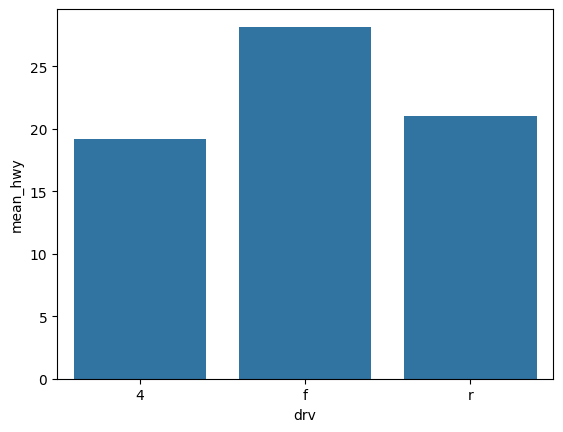

In [21]:
sns.barplot(data=df_mpg, x='drv', y='mean_hwy')

<Axes: xlabel='drv', ylabel='mean_hwy'>

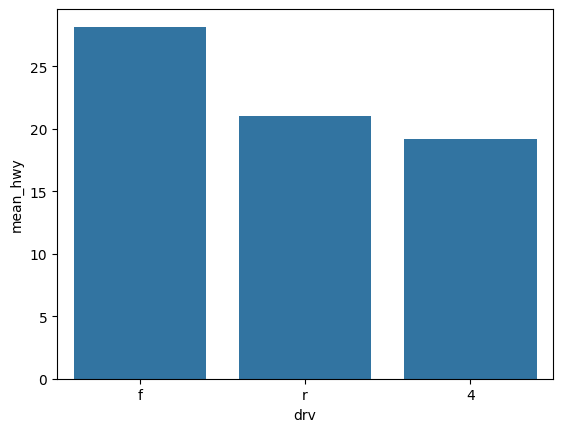

In [22]:
# 데이터 프레임 정렬하기
df_mpg = df_mpg.sort_values('mean_hwy', ascending=False)
sns.barplot(data=df_mpg, x='drv', y='mean_hwy')

### 빈도 막대 그래프 만들기
- 값의 빈도(개수)를 막대 길이로 표현한 그래프
- 여러 집단의 빈도를 비교할 때 빈도 막대 그래프 사용

### 1. 집단별 빈도표 만들기

In [23]:
# 구동 방식 별 빈도 -> 집단별 빈도표 만들기
df_mpg = mpg.groupby('drv', as_index=False)\
  .agg(n = ('drv', 'count'))
df_mpg

,drv,n
0,4,103
1,f,106
2,r,25


### 2. 그래프로 만들기

<Axes: xlabel='drv', ylabel='n'>

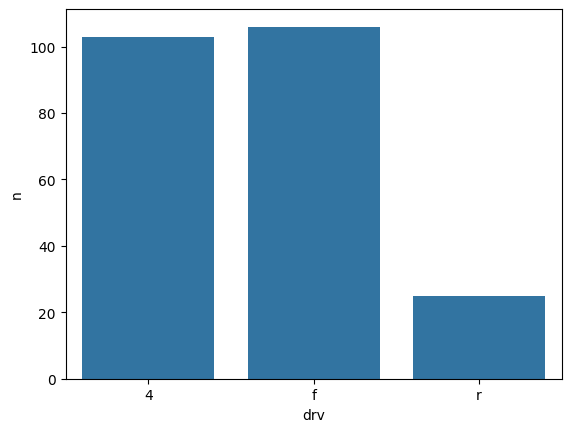

In [24]:
sns.barplot(data=df_mpg, x='drv', y='n')

<Axes: xlabel='drv', ylabel='count'>

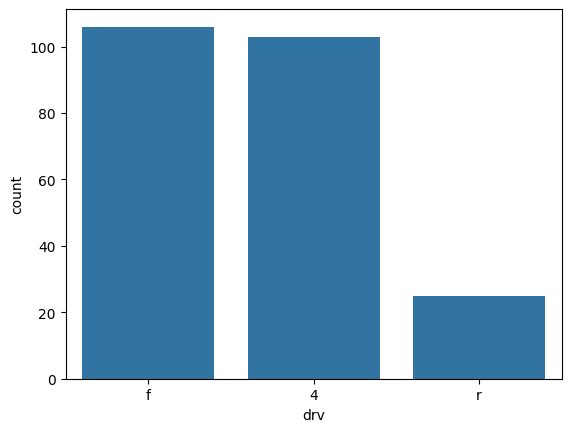

In [25]:
# sns.countplot()으로 빈도 막대 그래프 만들기 -> 집단별 빈도표 만드는 과정 생략하고 바로 빈도 막대 그래프 생성
sns.countplot(data = mpg, x='drv')

In [26]:
# 변수의 고유값을 출력하는 unique()
# 데이터 프레임에서 변수의 값 순서는 입력된 행 순서로 -> f, 4, r

mpg['drv'].unique()

array(['f', '4', 'r'], dtype=object)

In [29]:
# groupby()로 데이터 프레임을 요약 -> 값의 순서가 알파벳순으로 변경
df_mpg['drv'].unique()

array(['4', 'f', 'r'], dtype=object)

### 막대 정렬하기

<Axes: xlabel='drv', ylabel='count'>

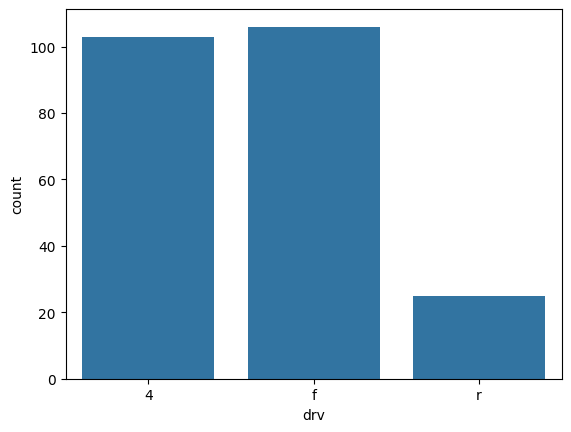

In [30]:
sns.countplot(data=mpg, x='drv', order = ['4','f','r'])

<Axes: xlabel='drv', ylabel='count'>

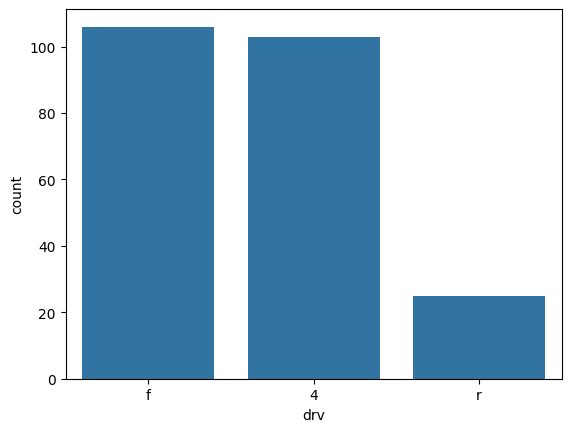

In [31]:
# drv의 빈도가 높은 순으로 막대 정렬
sns.countplot(data=mpg, x='drv',
              order=mpg['drv'].value_counts().index)

### 혼자서 해보기

In [41]:
# 어떤 회사에서 생산한 suv차종의 도시 연비가 높은지 알아보려고 합니다.
# suv 차종을 대상으로 cty 평균이 가장 높은 회사 다섯 곳을 막대 그래프로 표현해 보세요.
# 막대는 연비가 높은 순으로 정렬해보세요

df_suv = mpg.query('category == "suv"')\
  .groupby('manufacturer', as_index=False)\
  .agg(cty_mean=('cty', 'mean'))\
  .sort_values('cty_mean',ascending=False)\
  .head()

df_suv

,manufacturer,cty_mean
8,subaru,18.833333
9,toyota,14.375000
7,nissan,13.750000
3,jeep,13.500000
6,mercury,13.250000


<Axes: xlabel='manufacturer', ylabel='cty_mean'>

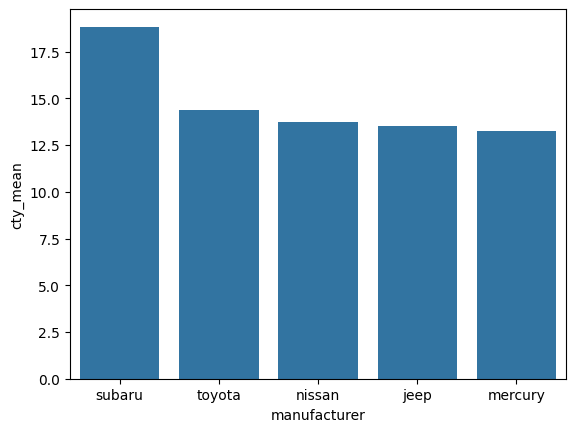

In [42]:
sns.barplot(data=df_suv, x = 'manufacturer', y='cty_mean')

In [44]:
# 자동차 중에서 어떤 category가 많은지 알아보려고 합니다.
# sns.barplot()을 이용해 자동차 종류별 빈도를 표현한 막대 그래프를 만들어 보세요.
# 막대는 빈도가 높은 순으로 정렬하세요

df_category = mpg.groupby('category', as_index=False)\
  .agg(counts = ('category','count'))\
  .sort_values('counts', ascending=False)

df_category

,category,counts
6,suv,62
1,compact,47
2,midsize,41
5,subcompact,35
4,pickup,33
3,minivan,11
0,2seater,5


<Axes: xlabel='category', ylabel='counts'>

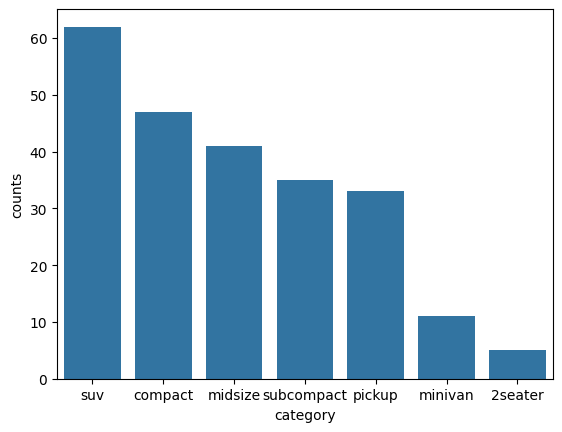

In [46]:
sns.barplot(data = df_category, x = 'category', y='counts')

## 08-4 선 그래프 - 시간에 따라 달라지는 데이터 표현하기
-선그래프 : 데이터를 선으로 표현한 그래프
-시간에 따라 달라지는 데이터를 표현할 때 자주 사용
- 환율, 주가지수 -> 경제지표가 시간에 따라 변하는 양상
- 일정 시간 간격을 두고 나열 -> 시계열 데이터
- 시계열 데이터를 선으로 -> 시계열 그래프

### 시계열 그래프 만들기


In [48]:
# economics 데이터 불러오기
economics = pd.read_csv('data/economics.csv')
economics.head()

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,506.7,198712.0,12.6,4.5,2944
1,1967-08-01,509.8,198911.0,12.6,4.7,2945
2,1967-09-01,515.6,199113.0,11.9,4.6,2958
3,1967-10-01,512.2,199311.0,12.9,4.9,3143
4,1967-11-01,517.4,199498.0,12.8,4.7,3066


<Axes: xlabel='date', ylabel='unemploy'>

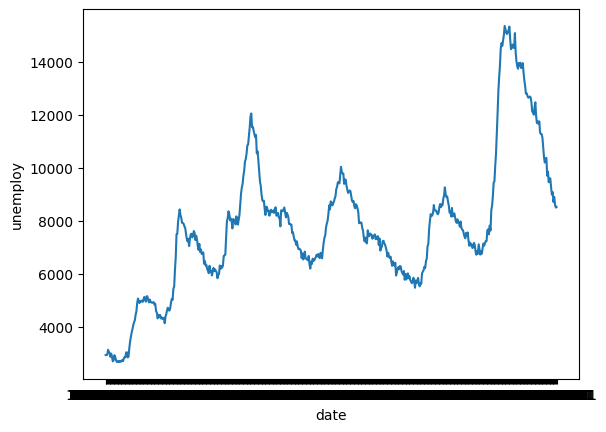

In [50]:
sns.lineplot(data = economics, x ='date', y='unemploy');

### x축에 연도 표시하기
- 변수 타입을 시간 타입(datetime64)으로 바꿔야 함
- 지금은 date가 문자(object)타입

In [56]:
# 날짜 시간 타입 변수 만들기
economics['date2'] = pd.to_datetime(economics['date'])
economics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    datetime64[ns]
 1   pce       574 non-null    float64       
 2   pop       574 non-null    float64       
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
 6   date2     574 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(4), int64(1)
memory usage: 31.5 KB


In [57]:
economics[['date', 'date2']]

,date,date2
0,1967-07-01,1967-07-01
1,1967-08-01,1967-08-01
2,1967-09-01,1967-09-01
3,1967-10-01,1967-10-01
4,1967-11-01,1967-11-01
...,...,...
569,2014-12-01,2014-12-01
570,2015-01-01,2015-01-01
571,2015-02-01,2015-02-01
572,2015-03-01,2015-03-01


In [58]:
# 날짜 시간 타입 -> 연, 월, 일 추출 가능
economics['date2'].dt.year

0      1967
1      1967
2      1967
3      1967
4      1967
       ... 
569    2014
570    2015
571    2015
572    2015
573    2015
Name: date2, Length: 574, dtype: int32

In [59]:
economics['date2'].dt.month

0       7
1       8
2       9
3      10
4      11
       ..
569    12
570     1
571     2
572     3
573     4
Name: date2, Length: 574, dtype: int32

In [60]:
economics['date2'].dt.day

0      1
1      1
2      1
3      1
4      1
      ..
569    1
570    1
571    1
572    1
573    1
Name: date2, Length: 574, dtype: int32

In [61]:
# 연도 변수 만들기
economics['year'] = economics['date2'].dt.year
economics.head()

,date,pce,pop,psavert,uempmed,unemploy,date2,year
0,1967-07-01,506.7,198712.0,12.6,4.5,2944,1967-07-01,1967
1,1967-08-01,509.8,198911.0,12.6,4.7,2945,1967-08-01,1967
2,1967-09-01,515.6,199113.0,11.9,4.6,2958,1967-09-01,1967
3,1967-10-01,512.2,199311.0,12.9,4.9,3143,1967-10-01,1967
4,1967-11-01,517.4,199498.0,12.8,4.7,3066,1967-11-01,1967


<Axes: xlabel='year', ylabel='unemploy'>

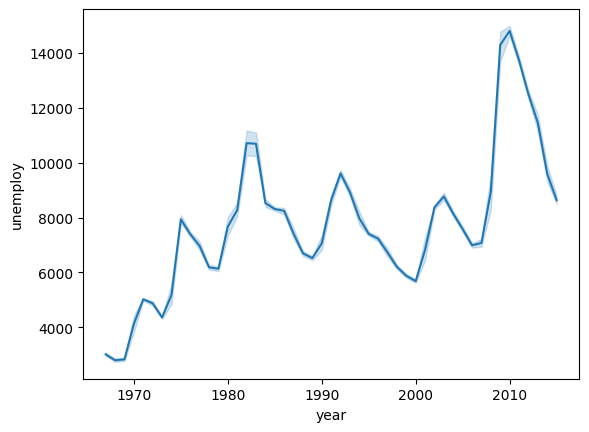

In [62]:
# x축에 연도 표시하기
sns.lineplot(data=economics, x='year', y='unemploy')

<ipython-input-63-f3223251e640>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=economics, x='year', y='unemploy', ci=None)


<Axes: xlabel='year', ylabel='unemploy'>

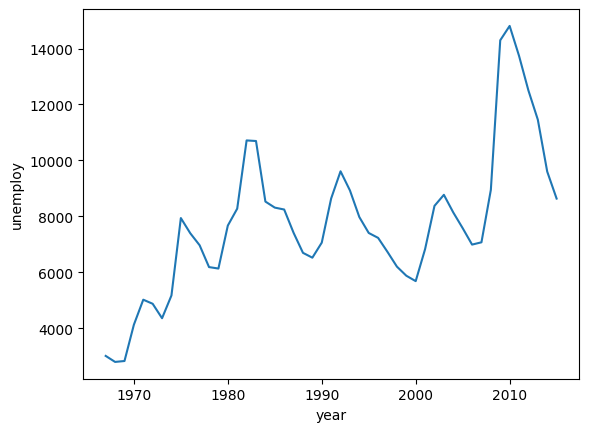

In [63]:
# 신뢰구간(confidence interval, 선 위아래에 표시된 면적) -> 표시 x
sns.lineplot(data=economics, x='year', y='unemploy', ci=None)

### 혼자서 해보기

<Axes: xlabel='year', ylabel='psavert'>

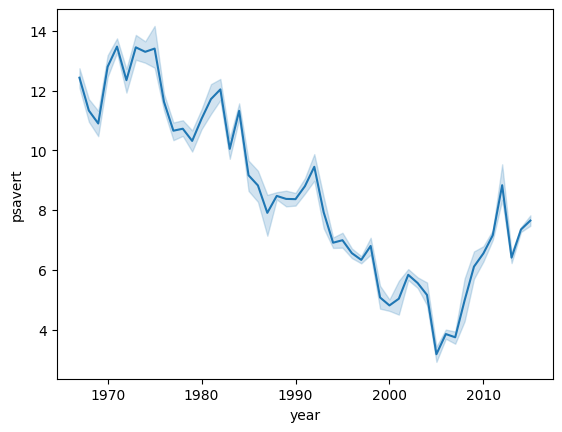

In [65]:
# psavert(개인 저축률)가 시간에 따라 어떻게 변해 왔는지 알아보려고 합니다.
# 연도별 개인 저축률의 변화를 나타낸 시계열 그래프 만들어보세요
sns.lineplot(data = economics, x='year', y='psavert')

<ipython-input-67-cd226c80074c>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_2014, x='month',y='psavert', ci=None )


<Axes: xlabel='month', ylabel='psavert'>

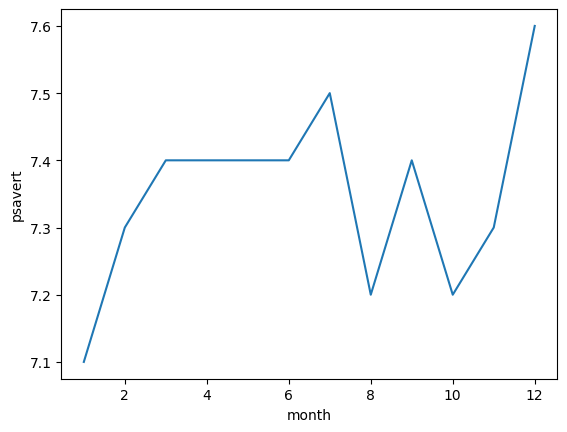

In [67]:
# 2014년 월별 psavert의 변화를 나타낸 시계열 그래프를 만드세요.

economics['month'] = economics['date2'].dt.month
df_2014 = economics.query('year == 2014')
sns.lineplot(data=df_2014, x='month',y='psavert', ci=None )

## 08-5 상자 그림 - 집단 간 분포 차이 표현하기
- 상자그림 : 데이터의 분포, 퍼져 있는 형태를 직사각형 상자 모양을 표현한 그래프
- 데이터가 어떻게 분포하고 있는지 알 수 있어서 평균만 볼 때보다 자세히 이해 가능


### 상자 그림 만들기

<Axes: xlabel='drv', ylabel='hwy'>

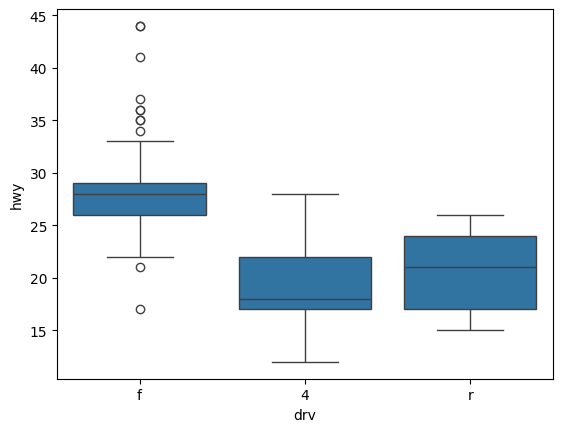

In [64]:
sns.boxplot(data=mpg, x='drv', y='hwy')

### 혼자서 해보기


<Axes: xlabel='category', ylabel='cty'>

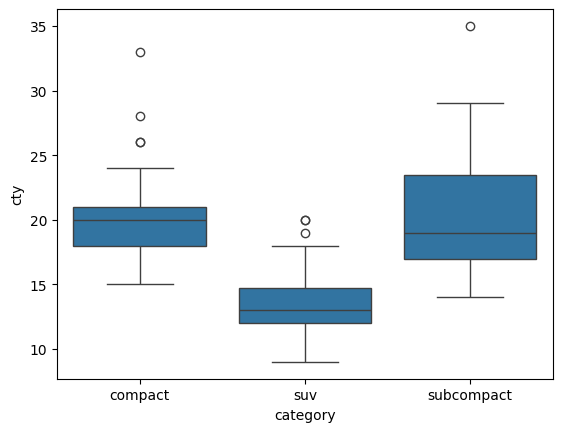

In [71]:
# category가 compact, subcompact, suv인 자동차의 cty가 어떻게 다른지 비교해 보려고 합니다,
# 세 차종의 cty를 나타낸 상자 그림을 만들어 보세요

df = mpg.query('category == "compact" | category == "suv" | category == "subcompact"')
sns.boxplot(data = df, x= 'category', y='cty')
